## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results
# Combine the data into a single dataset
combined_df= mouse_metadata.merge(study_results, on='Mouse ID', how='inner')

# Display the data table for preview
combined_df.sample(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1517,s337,Zoniferol,Male,14,27,40,56.994816,4
1795,x822,Ceftamin,Male,3,29,35,56.796567,2
1792,x822,Ceftamin,Male,3,29,20,51.914910,2
972,i901,Stelasyn,Male,23,29,15,51.419642,0
1275,o331,Ketapril,Male,24,30,35,70.126238,2
9,k403,Ramicane,Male,21,16,45,22.050126,1
207,a520,Ramicane,Male,13,21,10,36.429388,0
203,i738,Capomulin,Female,23,20,40,36.843898,2
785,e291,Naftisol,Female,14,29,0,45.000000,0
769,e213,Naftisol,Male,8,27,20,52.613763,2


In [2]:
# Checking the number of mice.
num_cases = len(combined_df)
print(f'Number of Cases = {num_cases}')

num_mice = len(combined_df['Mouse ID'].unique())
print(f'Number of Mice = {num_mice}')

Number of Cases = 1893
Number of Mice = 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mouse_mask = combined_df.duplicated(subset=['Mouse ID'])

dupe_mice = combined_df[dupe_mouse_mask].sample(100)
dupe_timepoint = dupe_mice.duplicated(subset=['Timepoint'])
mice_duplicates = pd.DataFrame({'Mouse ID': dupe_mice[dupe_timepoint]['Mouse ID']})

print(mice_duplicates)

#clean_df = combined_df.query("Mouse ID in mice_duplicates")


     Mouse ID
1819     y260
1612     v295
241      g288
1618     v409
760      d474
...       ...
1791     x822
1385     p981
1036     k382
1235     n763
1265     o302

[91 rows x 1 columns]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
unclean_df = combined_df[combined_df.isin(mice_duplicates)]
#unclean_df.to_excel('optional_unclean.xlsx', engine='xlsxwriter') 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[~combined_df.isin(mice_duplicates)].dropna()
#clean_df.to_excel('output1.xlsx', engine='xlsxwriter') 

In [6]:
# Checking the number of mice in the clean DataFrame.
count_clean_df = len(clean_df['Mouse ID'].unique())
print(f'Number of Mice that have no Timepoint duplication: {count_clean_df}')

Number of Mice that have no Timepoint duplication: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_clean = clean_df.groupby(by=['Drug Regimen'])
clean_df_mean = grouped_clean.mean()
clean_df_median = grouped_clean.median()
clean_df_var = grouped_clean.var()
clean_df_stdev = grouped_clean.std()
clean_df_sem = grouped_clean.sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame({'TumorVol Mean':clean_df_mean['Tumor Volume (mm3)'],
                                'TumorVol Median':clean_df_median['Tumor Volume (mm3)'],
                                'TumorVol Variance':clean_df_var['Tumor Volume (mm3)'],
                                 'TumorVol StdDev':clean_df_stdev['Tumor Volume (mm3)'],
                                 'TumorVol StdErr':clean_df_sem['Tumor Volume (mm3)']})


summary_stats_df


,TumorVol Mean,TumorVol Median,TumorVol Variance,TumorVol StdDev,TumorVol StdErr
Drug Regimen,,,,,
Capomulin,40.609086,41.439242,25.029856,5.002985,0.339625
Ceftamin,52.474174,51.587799,39.458832,6.281627,0.489024
Infubinol,52.886785,51.820584,44.331950,6.658224,0.507685
Ketapril,55.178900,53.721242,68.349860,8.267397,0.617934
Naftisol,54.114855,52.026639,65.892080,8.117394,0.608424
Placebo,54.010478,52.288934,61.264168,7.827143,0.591676
Propriva,52.327766,50.854632,44.004564,6.633594,0.543445
Ramicane,40.384697,41.020724,23.196916,4.816318,0.324716
Stelasyn,54.329649,52.431737,60.773934,7.795764,0.596157


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_grouped = clean_df.groupby(by='Drug Regimen')

# Using the aggregation method, produce the same summary statistics in a single line
df_grouped['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.609086,41.439242,25.029856,5.002985,0.339625
Ceftamin,52.474174,51.587799,39.458832,6.281627,0.489024
Infubinol,52.886785,51.820584,44.331950,6.658224,0.507685
Ketapril,55.178900,53.721242,68.349860,8.267397,0.617934
Naftisol,54.114855,52.026639,65.892080,8.117394,0.608424
Placebo,54.010478,52.288934,61.264168,7.827143,0.591676
Propriva,52.327766,50.854632,44.004564,6.633594,0.543445
Ramicane,40.384697,41.020724,23.196916,4.816318,0.324716
Stelasyn,54.329649,52.431737,60.773934,7.795764,0.596157


## Bar and Pie Charts

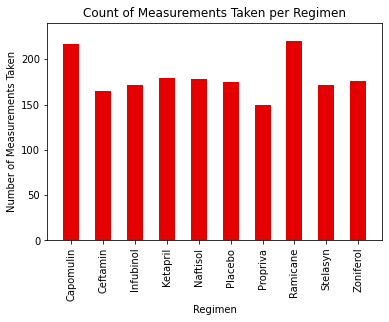

In [38]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
cmap = ListedColormap(['#e50000'])
count_gph = grouped_clean['Mouse ID'].count().plot.bar(x=0,y=1,colormap=cmap)

count_gph.set_xlabel('Regimen')
count_gph.set_ylabel('Number of Measurements Taken')
count_gph.set_title('Count of Measurements Taken per Regimen')

count_gph.set_ylim(0,240)
count_gph.set_xlim(-.75,9.75)

count_gph

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
